## Fake News Detection

### What is Fake News?

Fake news refers to false or misleading information presented as news. The term is often used to describe a variety of misinformation, including fabricated stories, propaganda, and hoaxes designed to deceive the public. Fake news can spread rapidly through social media platforms, news websites, and other digital channels, reaching a wide audience and causing significant impacts on public opinion and behavior.

**The Importance of Recognizing Fake News**

- **Impact on Society**: fake news can have profound consequences on society. By spreading false information, it can create confusion, fear, and mistrust among the public. It can influence people's perceptions and decisions, sometimes leading to harmful behaviors or beliefs. For example, during elections, fake news can manipulate voters' opinions, potentially altering the outcome of the vote. In public health, misinformation about diseases and treatments can lead to inadequate responses to health crises, putting lives at risk.

- **Threat to Democracy**: in democratic societies, an informed electorate is essential for the proper functioning of the political system. Fake news undermines this by spreading false information, thus distorting the reality on which citizens base their decisions. It can erode trust in legitimate news sources and government institutions, ultimately weakening the democratic process.

- **Economic Consequences**: fake news can also have economic repercussions. Businesses can suffer from misinformation, such as false claims about their products or services, leading to financial losses and damage to their reputation. Stock markets can be affected by fake news that influences investor behavior, causing unnecessary market volatility.

- **Personal Impact**: on a personal level, individuals can be misled by fake news, making decisions based on false information that may negatively affect their lives. This can include falling victim to scams, believing in false medical advice, or being influenced by inaccurate news stories that affect their personal beliefs and relationships.

### Objectives

### 1. Data Preprocessing
In this notebook we are going to explore and preprocess the dataset. The dataset, called `news.csv` can be downloaded [here](https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view).

#### 1.1 Data Exploration
Before handling the data, we want to explore its structure, look at some examples, begin to grasp what features might be relevant for classification.\
We start by loading the main libraries, which will be used extensively throughout the project.

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Load the data
data = pd.read_csv('data/news.csv', index_col=0)

In [18]:
# Display the first few rows of the data
data.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [19]:
# Display some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6335 entries, 8476 to 4330
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB


In [20]:
# The indexes are unique but not sorted nor continuous
index_map = {index: i for i, index in enumerate(data.index)}
data = data.rename(index=index_map)

In [21]:
# Change the labels to integers: 1 is FAKE, 0 is REAL
data['label'] = data['label'].apply(lambda x: 1 if x == 'FAKE' else 0)

In [22]:
# Final check
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


After careful inspection of several text examples, we can conclude that there is no particular structure. There is no mention of the author's name or the newspaper in which it was published, the date or even the subject. Consequently, we have to make do with the text itself, without extracting any further features for the time being.

Let's visualize the distribution of the labels and split the dataset into statistically accurate training and test sets.

In [23]:
# Visualize the distribution of the labels
print('Real news: ', data['label'].value_counts()[0])
print('Fake news: ', data['label'].value_counts()[1])

Real news:  3171
Fake news:  3164


In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['title', 'text']], data['label'], test_size=0.2, random_state=42)

In [25]:
# Successfully split and shuffled the data
X_train.head()

,title,text
1142,Alabama Sen. Sessions Backs Trump’s Immigratio...,Donald Trump received a key endorsement for hi...
2654,"As of 6:00 AM NOVEMBER 6th, Trump is leading i...","Nina November 6, 2016 @ 2:39 pm \nPolish gover..."
5395,Time: Investigating Hillary is an Attack on Al...,Time: Investigating Hillary is an Attack on Al...
1170,Women Should Vote With Their Husbands,"Taki's Magazine October 28, 2016 \nThis electi..."
4371,Pakistan police detain dozens of Imran Khan's ...,Pakistan Pakistan's cricketer turned politicia...


#### 1.2 Word Clouds
Let us now perform a qualitative inspection of the most common words in the training set, distinguished by label. We use the `wordcloud` visualisation.

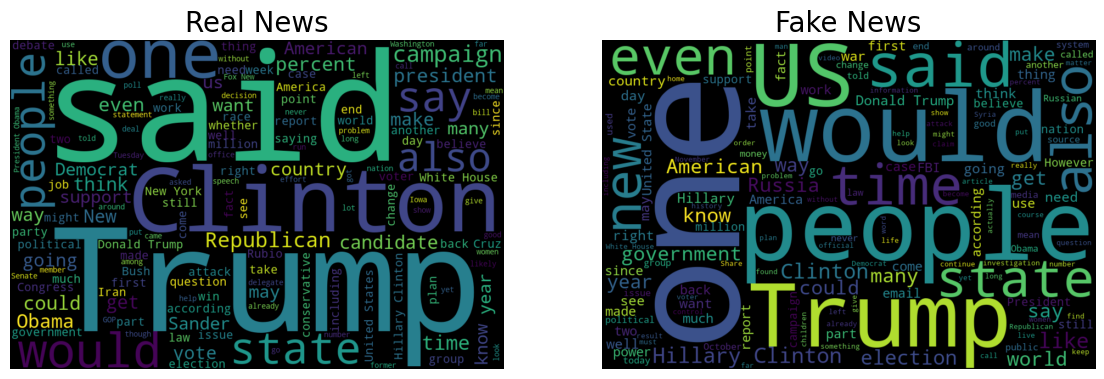

In [26]:
from wordcloud import WordCloud

# Define the set of stopwords using nltk
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

real_news = ' '.join(X_train[y_train == 0]['text'])
fake_news = ' '.join(X_train[y_train == 1]['text'])

# Exclude 'U' and 'S' from the wordcloud
stop_words = stop_words.union({'U', 'S', 'u', 's'})

# Generate the wordclouds and display them
# Real news
wordcloud = WordCloud(max_words=150, width=900, height=600, stopwords=stop_words).generate(real_news)
fig, ax = plt.subplots(1, 2, figsize=(14, 10))
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].set_title('Real News', fontsize=20)
ax[0].axis('off')
# Fake news
wordcloud = WordCloud(max_words=150, width=900, height=600, stopwords=stop_words).generate(fake_news)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].set_title('Fake News', fontsize=20)
ax[1].axis('off')

plt.show();

Let us focus on some of the most significant differences:
1. **said/say**: this term denotes relevance to the facts, and so it is not surprising to hear it dominating the real news. What is interesting, however, is to see it greatly reduced (proportionally) within fake news, which focuses instead on ‘eventualities’ rather than facts.
2. **would**: by analogy with the previous point, this term denotes a possibility, and its predominance in fake news is therefore understandable.
3. **people**: this term dominates in fake news, while it is less important in real ones. One possible explanation is the usual tone of the news published/disseminated by unreliable sources: these try to leverage arguments (and thus words) that move specific feelings, often focused on ordinary ‘people’. Another factor could be the generic tone in which fake news is presented, referring generically to the people as a whole rather than to well-defined groups or categories.
4. **explicit names**: in fake news, the explicit names of public figures are less important. This may be related to the criminal repercussions that could result from slandering a media exposed figure.

#### 1.3 Data Preprocessing
Now let us clean up the texts in order to be able to perform some simple operations. To do this, we use the `nltk` library and its built-in functions:
- `WordNetLemmatizer`: lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
- `word_tokenize`: the tokenization divides the strings into lists of substrings, separating words from commands such as `\n` or `\t`.

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK datasets
if not nltk.data.find('corpora/stopwords'):
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

# Define the english stopwords
stop_words = set(stopwords.words('english'))
# Define the lemmatizer, which reduces words to their base or root form
lemmatizer = WordNetLemmatizer()

# Function that tokenizes, removes stopwords, and lemmatizes the text
def process_text(text):
    tokens = word_tokenize(text.lower())
    # Remove non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply the function to the title and text columns
X_train['title'] = X_train['title'].apply(process_text)
X_train['text'] = X_train['text'].apply(process_text)
X_test['title'] = X_test['title'].apply(process_text)
X_test['text'] = X_test['text'].apply(process_text)

# Save the processed data
X_train.to_csv('processed_data/X_train.csv', header=True, sep=',')
X_test.to_csv('processed_data/X_test.csv', header=True, sep=',')
y_train.to_csv('processed_data/y_train.csv', header=True, sep=',')
y_test.to_csv('processed_data/y_test.csv', header=True, sep=',')

We now construct two very important lists of values, which allow us to understand the distribution of words in the texts in greater depth.\
We calculate a list, with the ending `df`, containing the **Document Frequency (DF)**, i.e. the number of documents/titles containing a certain word.\
Then we construct a list, with the ending `tf`, containing the **Term Frequency (TF)**, the total number of times the word appears in all the documents.

In [395]:
from collections import Counter

# Function that generates a list of dictionaries with the words and their counts for each text
def count_words(text):
    split_text = text.split()
    counter = Counter(split_text)
    # Use most_common to get the words and their counts
    return dict(counter.most_common())

# Apply the function to the text and title columns
real_text_top_words = X_train[y_train==0]['text'].apply(count_words)
fake_text_top_words = X_train[y_train==1]['text'].apply(count_words)
real_title_top_words = X_train[y_train==0]['title'].apply(count_words)
fake_title_top_words = X_train[y_train==1]['title'].apply(count_words)

In [396]:
# Function that returns a dictionary with the counts of the keys in a list of dictionaries, i.e. how many times each word appears in the corpus (document frequency)
def key_count(dict_list):
    key_counts = {}
    for d in dict_list:
        for key in d.keys():
            if key in key_counts:
                key_counts[key] += 1
            else:
                key_counts[key] = 1
    return sorted(key_counts.items(), key = lambda x: x[1], reverse=True)

# Function that returns a dictionary with the sum of the values of the keys in a list of dictionaries, i.e. the total count of each word in the corpus (term frequency)
def word_count(dict_list):
    word_counts = {}
    for d in dict_list:
        for key in d.keys():
            if key in word_counts:
                word_counts[key] += d[key]
            else:
                word_counts[key] = d[key]
    return sorted(word_counts.items(), key = lambda x: x[1], reverse=True)

# Get the document frequency of the top words for the text and title columns
real_text_df = key_count(real_text_top_words)
fake_text_df = key_count(fake_text_top_words)
real_title_df = key_count(real_title_top_words)
fake_title_df = key_count(fake_title_top_words)

# Get the term frequency for the text and title columns
real_text_tf = word_count(real_text_top_words)
fake_text_tf = word_count(fake_text_top_words)
real_title_tf = word_count(real_title_top_words)
fake_title_tf = word_count(fake_title_top_words)

Having calculated these quantities, we can now begin to study some characteristics of the dataset.

In [397]:
# Print the length of the dictionaries
print('Real text: ', len(real_text_df))
print('Fake text: ', len(fake_text_df))
print('Real title: ', len(real_title_df))
print('Fake title: ', len(fake_title_df))

Real text:  33540
Fake text:  39277
Real title:  4167
Fake title:  5556


Does this mean that, by absolute, fake news contains more terms? The next cell suggests just that: fake news seems to contain a greater variety of terms, as the average absolute document frequency is lower and, for the same number of documents, the number of top words is higher. A similar but less pronounced behaviour can also be seen on titles due to their smaller size.

In [398]:
# Compute the average values for the document frequency
print('Average real DF: ', round(np.mean([x[1] for x in real_text_df]), 3))
print('Average fake DF: ', round(np.mean([x[1] for x in fake_text_df]), 3))
print('Average real DF (titles): ', round(np.mean([x[1] for x in real_title_df]), 3))
print('Average fake DF (titles): ', round(np.mean([x[1] for x in fake_title_df]), 3))

Average real DF:  21.777
Average fake DF:  14.363
Average real DF (titles):  4.072
Average fake DF (titles):  3.316


In [399]:
# Combine the first 200 words of the real and fake texts document frequency
real_text_df_dict = dict(real_text_df[:200])
fake_text_df_dict = dict(fake_text_df[:200])

combined_text_df = {}
for key in real_text_df_dict.keys():
    if key in fake_text_df_dict:
        combined_text_df[key] = (real_text_df_dict[key]/len(X_train), fake_text_df_dict[key]/len(X_train))

#### 1.4 Data Visualization

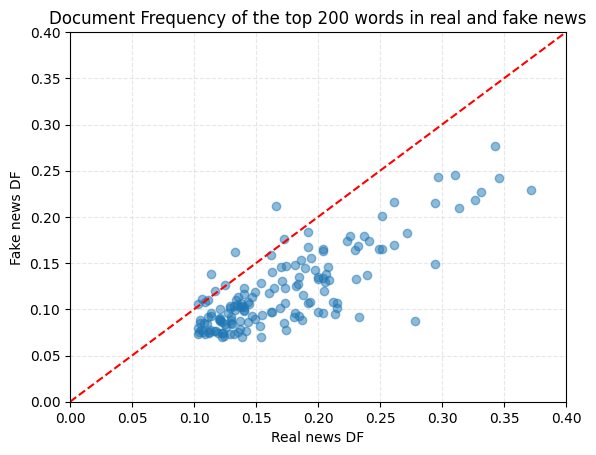

In [400]:
plt.plot([combined_text_df[key][0] for key in combined_text_df.keys()], [combined_text_df[key][1] for key in combined_text_df.keys()], 'o', alpha=0.5)
# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Real news DF')
plt.ylabel('Fake news DF')
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.grid(linestyle='--', alpha=0.3)
plt.title('Document Frequency of the top 200 words in real and fake news')
plt.show();

This graph confirms what we said earlier: the line on which the top 200 words in both texts are distributed is slightly shifted below the bisector. This means that the most common words in fake news are less frequent than the same words in real news.
Could this be related to text lengths? Yes, in fact real texts tend to be longer, so a word is more likely to be quoted at least once. This makes even more sense if we look at the difference between the most repeated words (TF) in real news, where the value is almost double that of fake news. We can therefore conclude that fake news tends to have shorter texts with richer vocabulary than real news.\
We conclude with the following remarks:
- real news has longer texts on average;
- real news shares more terms;
- fake news has a richer vocabulary (more lemmas in total);
- fake news shares fewer terms.

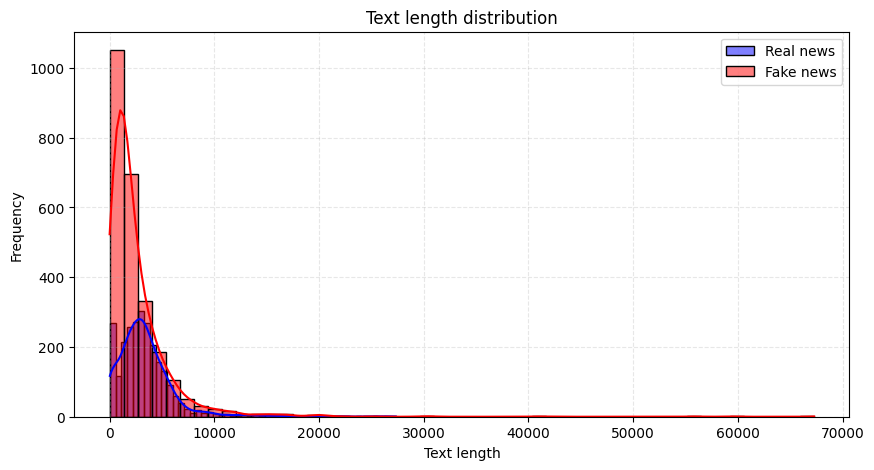

In [401]:
# Plot the text length distributions
plt.figure(figsize=(10, 5))
sns.histplot(X_train[y_train==0]['text'].apply(len), bins=50, color='blue', label='Real news', kde=True)
sns.histplot(X_train[y_train==1]['text'].apply(len), bins=50, color='red', label='Fake news', kde=True)
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.title('Text length distribution')
plt.legend()
plt.grid(linestyle='--', alpha=0.3)
plt.show();

As far as TF is concerned, the situation is more balanced. However, this gives us pause for thought: take the word ‘trump’, which ranks second in both fake and real news. In real news this is repeated 12110 times, in fakes 5398. At the same time, this words appears in 973 real news and 849 fake news. We would therefore like an indicator of the relative importance of a word, combining both DF and TF.

We can then define the Term Frequency Inverse Document Frequency (TFIDF): it is a statistical formula to convert text documents into vectors based on the relevancy of the word. It is based on the bag of the words model to create a matrix containing the information about less relevant and most relevant words in the document.\
The **Term Frequency** is defined as the ratio of the occurrence of a word $w$ in a document $d$, divided by the total number of words in the document:
$$\text{TF}(w,d) \triangleq \frac{n^d(w)}{n^d}$$
The Inverse Document Frequency computes the importance of a word $w$ in a set of documents $D$. It is calculated by dividing the total number of documents in the corpus by the number of documents containing the word:
$$\text{IDF}(w,D) \triangleq \ln{\left(\frac{N^D}{N^D(w)}\right)}$$
Notice that we have just one IDF for each word, while we have $N^D$ TF for each word, where $N^D$ is the total number of texts in the dataset.\
As you can see, very common words have very low importance, since $\text{IDF} \approx \ln(1) = 0$. Finally, the TFIDF is computed as:
$$\text{TFIDF}(w,d,D) = \text{TF}(w,d) \times \text{IDF}(w,D)$$
We will use this exact relationship when preparing the data for training.\
Now for us, the TF is the total number of repetitions of a certain word, divided by the total number of words.

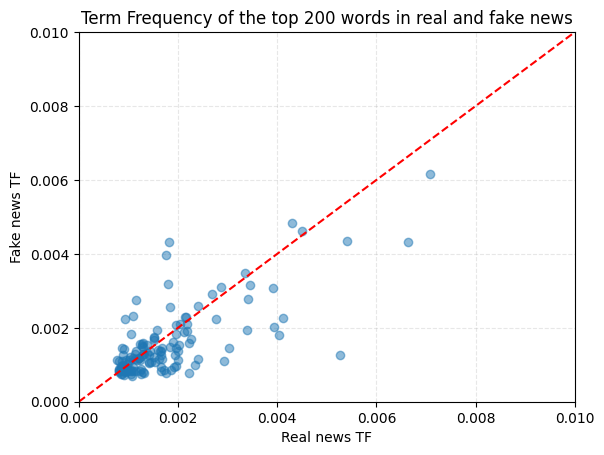

In [402]:
# Total word count for the real and fake news
real_text_word_count = sum([x[1] for x in real_text_tf])
fake_text_word_count = sum([x[1] for x in fake_text_tf])

# Repeat the process for the tf values
real_text_tf_dict = dict(real_text_tf[:200])
fake_text_tf_dict = dict(fake_text_tf[:200])

combined_text_tf = {}
for key in real_text_tf_dict.keys():
    if key in fake_text_tf_dict:
        combined_text_tf[key] = (real_text_tf_dict[key], fake_text_tf_dict[key])

plt.plot([combined_text_tf[key][0]/real_text_word_count for key in combined_text_tf.keys()], [combined_text_tf[key][1]/fake_text_word_count for key in combined_text_tf.keys()], 'o', alpha=0.5)
# Plot the diagonal line
plt.plot([0, 0.1], [0, 0.1], 'r--')
plt.xlabel('Real news TF')
plt.ylabel('Fake news TF')
plt.xlim(0, 0.01)
plt.ylim(0, 0.01)
plt.grid(linestyle='--', alpha=0.3)
plt.title('Term Frequency of the top 200 words in real and fake news')
plt.show();

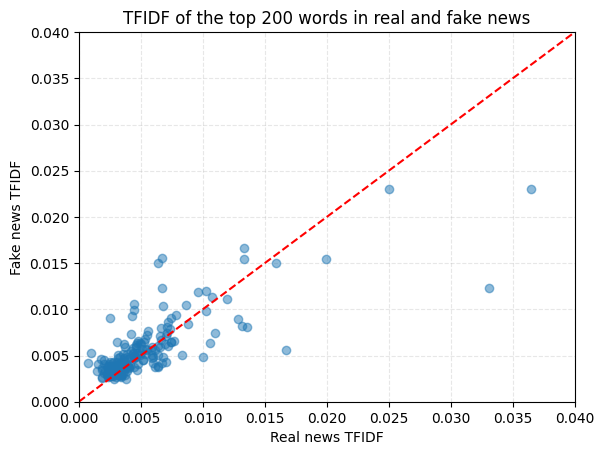

In [403]:
# Compute the total number of words in the real news
def count_words(dictionary):
    total_words = 0
    for item in dictionary:
        total_words += item[1]
    return total_words

real_text_words = count_words(real_text_tf)
fake_text_words = count_words(fake_text_tf)
real_title_words = count_words(real_title_tf)
fake_title_words = count_words(fake_title_tf)

# Compute the TFIDF for the top 200 words in the text
def compute_tfidf(tf, df, total_words):
    tf = dict(tf)
    df = dict(df)
    tfidf = {}
    for key in tf:
        tfidf[key] = (tf[key]/total_words) * np.log(len(df)/df[key])
    return dict(sorted(tfidf.items(), key = lambda x: x[1], reverse=True))

real_text_tfidf = compute_tfidf(real_text_tf, real_text_df, real_text_words)
fake_text_tfidf = compute_tfidf(fake_text_tf, fake_text_df, fake_text_words)
real_title_tfidf = compute_tfidf(real_title_tf, real_title_df, real_title_words)
fake_title_tfidf = compute_tfidf(fake_title_tf, fake_title_df, fake_title_words)

# Combine the TFIDF values for the real and fake news
combined_text_tfidf = {}
for key in real_text_tfidf.keys():
    if key in fake_text_df_dict:
        combined_text_tfidf[key] = (real_text_tfidf[key], fake_text_tfidf[key])

# Plot the TFIDF values, as before
plt.plot([combined_text_tfidf[key][0] for key in list(combined_text_tfidf.keys())[:200]], [combined_text_tfidf[key][1] for key in list(combined_text_tfidf.keys())[:200]], 'o', alpha=0.5)
plt.plot([0, 0.1], [0, 0.1], 'r--')
plt.xlabel('Real news TFIDF')
plt.ylabel('Fake news TFIDF')
plt.xlim(0, 0.04)
plt.ylim(0, 0.04)
plt.grid(linestyle='--', alpha=0.3)
plt.title('TFIDF of the top 200 words in real and fake news')
plt.show();

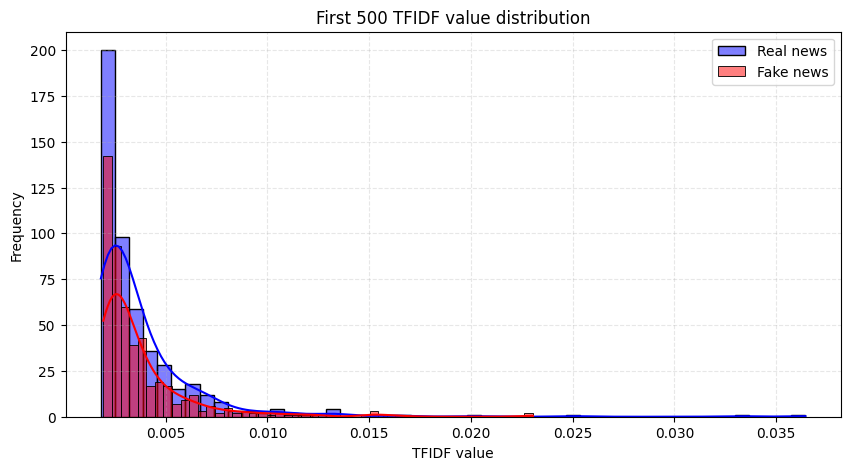

In [404]:
# Build an histogram of the TFIDF values
plt.figure(figsize=(10, 5))
sns.histplot(list(real_text_tfidf.values())[:500], bins=50, color='blue', label='Real news', kde=True)
sns.histplot(list(fake_text_tfidf.values())[:500], bins=50, color='red', label='Fake news', kde=True)
plt.xlabel('TFIDF value')
plt.ylabel('Frequency')
plt.title('First 500 TFIDF value distribution')
plt.legend()
plt.grid(linestyle='--', alpha=0.3)
plt.show();

Since the TFIDF is a measure of the relative importance of a word, we can therefore conclude the following from the last two plots:
- Real news words tend to assume greater importance: from the plot ‘TFIDF of the top 200 words’, we note a (slight) downward slope below the bisector line as the TFIDF value increases. This means that the relative importance of a word in real news tends to be greater than that of the same word in fake news.
- Real news tends to have more words with greater importance. We observe this in the ‘TFIDF value distribution’ plot, where the blue bars are always higher than the red ones. This is a clear consequence of the richer vocabulary of fake news, so it is clear that fewer words will stand out than others.

Below is the list of the 20 words with the highest TFIDF score: we note that these words are precisely those most relevant in the wordcloud, except for very common words such as "one".

In [405]:
# Print the top 20 words for the real and fake news
print('Real news: ', list(real_text_tfidf.keys())[:20])
print('Fake news: ', list(fake_text_tfidf.keys())[:20])

Real news:  ['trump', 'said', 'clinton', 'state', 'republican', 'would', 'obama', 'people', 'one', 'campaign', 'president', 'new', 'say', 'sander', 'year', 'party', 'time', 'also', 'candidate', 'american']
Fake news:  ['trump', 'clinton', 'people', 'u', 'one', 'state', 'would', 'hillary', 'said', 'election', 'time', 'american', 'year', 'new', 'world', 'like', 'government', 'war', 'also', 'even']


**N-gram Analysis**: helps to understand the combinations of words that frequently occur together. Bigrams and trigrams are commonly used for this purpose.

In [406]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot n-grams
def get_ngrams(corpus, n):
    # Create a CountVectorizer object and fit it to the corpus
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    # Transform the corpus into a bag of words, that is, a matrix with the counts of each word in each text
    bag_of_words = vec.transform(corpus)
    # Sum the words
    sum_words = bag_of_words.sum(axis=0)
    # Create a list with the words and their counts
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    # Create a dataframe with the top k word combinations
    words_freq_df = pd.DataFrame(words_freq, columns=['N-gram', 'Frequency'])
    # Return the top words
    return words_freq_df

# Get the bigrams
real_text_words_freq = get_ngrams(X_train[y_train==0]['text'], n=2)
fake_text_words_freq = get_ngrams(X_train[y_train==1]['text'], n=2)

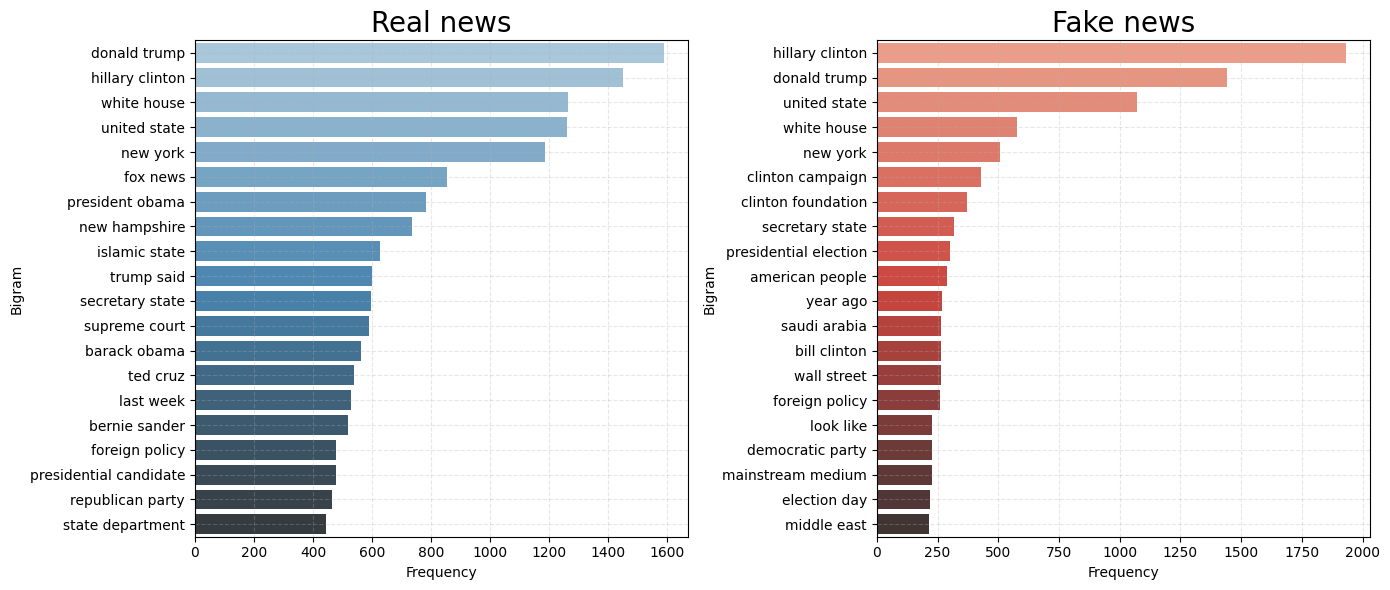

In [407]:
# Plot the bigrams
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0] = sns.barplot(x='Frequency', y='N-gram', data=real_text_words_freq[:20], ax=ax[0], palette='Blues_d')
ax[0].set_title('Real news', fontsize=20)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Bigram')
ax[0].grid(linestyle='--', alpha=0.3)
ax[1] = sns.barplot(x='Frequency', y='N-gram', data=fake_text_words_freq[:20], ax=ax[1], palette='Reds_d')
ax[1].set_title('Fake news', fontsize=20)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Bigram')
ax[1].grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show();

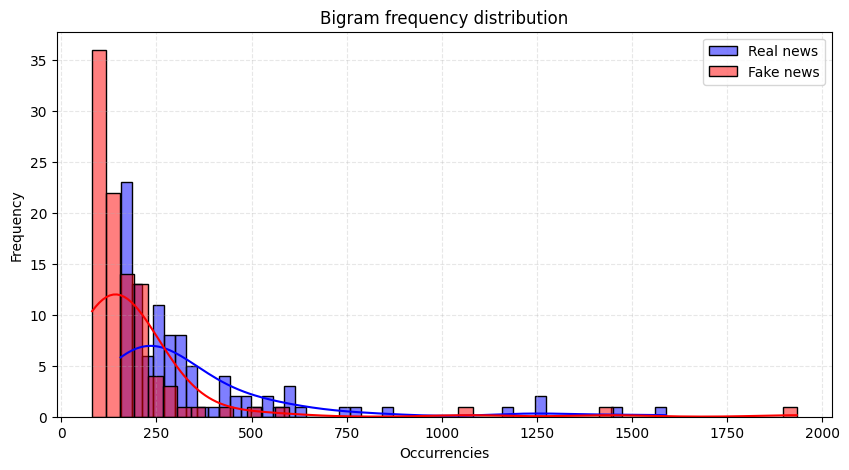

In [408]:
# Plot the distribution of the bigrams
plt.figure(figsize=(10, 5))
sns.histplot(real_text_words_freq['Frequency'][:100], bins=50, color='blue', label='Real news', kde=True)
sns.histplot(fake_text_words_freq['Frequency'][:100], bins=50, color='red', label='Fake news', kde=True)
plt.xlabel('Occurrencies')
plt.ylabel('Frequency')
plt.title('Bigram frequency distribution')
plt.legend()
plt.grid(linestyle='--', alpha=0.3)
plt.show();


In light of everything we have said so far, we note an interesting phenomenon: there are two bigrams in fake news that are clearly superior to the others and also to the top bigram in real news. This is a clear sign characteristic of fake news: despite the shorter average texts and richer vocabulary, these two word combinations stand out over the others because they are repeated many times. The fake news is therefore concentrated around these two themes: ‘donald trump’ and ‘hillary clinton’. The other combinations, on the other hand, are far less frequent, and fall below even those of real news. Notice how the distribution in the fake news is different between the first and last positions: this difference is instead reduced in the real news, where, remember, the size of the texts is larger and there is therefore a greater probability of finding word combinations.\
Additionally, the frequency distribution confirms this result.

The `TfidfVectorizer()` instance can remove the stop words from the resulting tokens. Additionally, when building the vocabulary we can ignore terms that have a document frequency strictly higher than the given threshold `max_df` (corpus-specific stop words).

#### 1.5 Title Analysis
Here we apply the same process to the news titles.

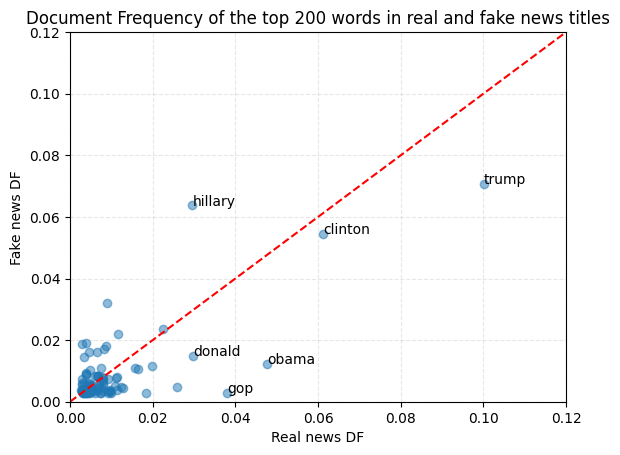

In [409]:
# Repeat the process for the titles
# Combine the first 200 words of the real and fake texts document frequency
real_title_df_dict = dict(real_title_df[:200])
fake_title_df_dict = dict(fake_title_df[:200])

combined_title_df = {}
for key in real_title_df_dict.keys():
    if key in fake_title_df_dict:
        combined_title_df[key] = (real_title_df_dict[key]/len(X_train), fake_title_df_dict[key]/len(X_train))

plt.plot([combined_title_df[key][0] for key in combined_title_df.keys()], [combined_title_df[key][1] for key in combined_title_df.keys()], 'o', alpha=0.5)
# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Real news DF')
plt.ylabel('Fake news DF')
plt.xlim(0, 0.12)
plt.ylim(0, 0.12)
plt.grid(linestyle='--', alpha=0.3)
plt.title('Document Frequency of the top 200 words in real and fake news titles')
# Write the first 6 words in the plot
for key in list(combined_title_df.keys())[:6]:
    plt.text(combined_title_df[key][0], combined_title_df[key][1], key)
plt.show();

The titles go straight to explicit names.\
Interestingly, the only term in the high DF band above the straight bisector is ‘hillary’: this may mean that, in the titles, the Democratic candidate is more often referred to by her first name rather than her surname. This makes sense thinking that reputable newspapers have more formal language, and tend to refer to public figures by their surnames.

In [410]:
# Print the top 20 words for the real and fake news titles
print('Real news: ', list(real_title_tfidf.keys())[:20])
print('Fake news: ', list(fake_title_tfidf.keys())[:20])

Real news:  ['trump', 'clinton', 'obama', 'gop', 'donald', 'hillary', 'debate', 'republican', 'new', 'say', 'house', 'sander', 'cruz', 'state', 'campaign', 'iran', 'deal', 'white', 'attack', 'bush']
Fake news:  ['trump', 'hillary', 'clinton', 'election', 'new', 'u', 'video', 'russia', 'fbi', 'america', 'email', 'war', 'news', 'comment', 'world', 'donald', 'obama', 'say', 'american', 'campaign']


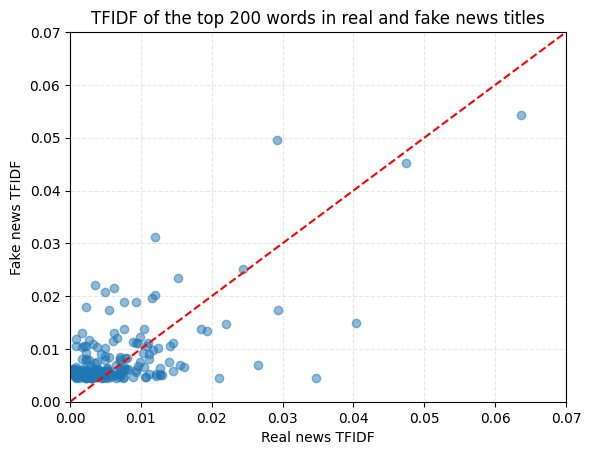

In [411]:
# Combine the TFIDF values for the real and fake news titles
combined_title_tfidf = {}
for key in real_title_tfidf.keys():
    if key in fake_title_df_dict:
        combined_title_tfidf[key] = (real_title_tfidf[key], fake_title_tfidf[key])

# Plot the TFIDF values, as before
plt.plot([combined_title_tfidf[key][0] for key in list(combined_title_tfidf.keys())[:200]], [combined_title_tfidf[key][1] for key in list(combined_title_tfidf.keys())[:200]], 'o', alpha=0.5)
plt.plot([0, 0.1], [0, 0.1], 'r--')
plt.xlabel('Real news TFIDF')
plt.ylabel('Fake news TFIDF')
plt.xlim(0, 0.07)
plt.ylim(0, 0.07)
plt.grid(linestyle='--', alpha=0.3)
plt.title('TFIDF of the top 200 words in real and fake news titles')
plt.show();

At low TFIDF, we notice the formation of a segment parallel to the x-axis: this means that the headlines in fake news are more diverse and therefore the words lose relative importance compared to those in real news.

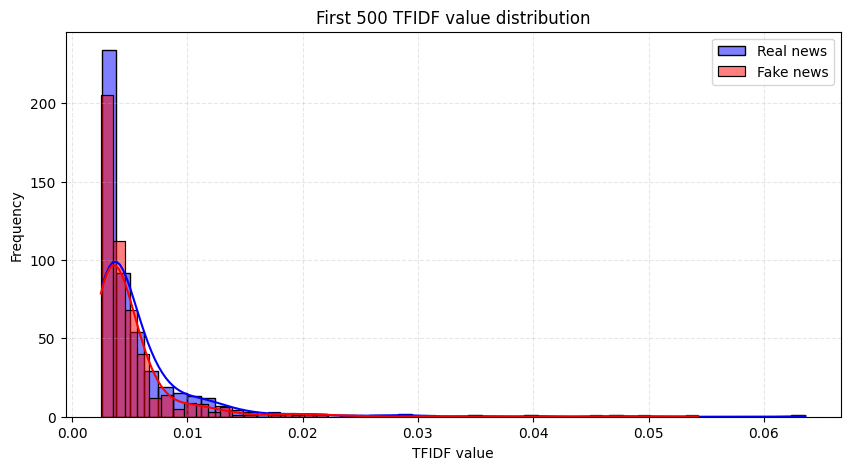

In [412]:
# Build an histogram of the TFIDF values
plt.figure(figsize=(10, 5))
sns.histplot(list(real_title_tfidf.values())[:500], bins=50, color='blue', label='Real news', kde=True)
sns.histplot(list(fake_title_tfidf.values())[:500], bins=50, color='red', label='Fake news', kde=True)
plt.xlabel('TFIDF value')
plt.ylabel('Frequency')
plt.title('First 500 TFIDF value distribution')
plt.legend()
plt.grid(linestyle='--', alpha=0.3)
plt.show();

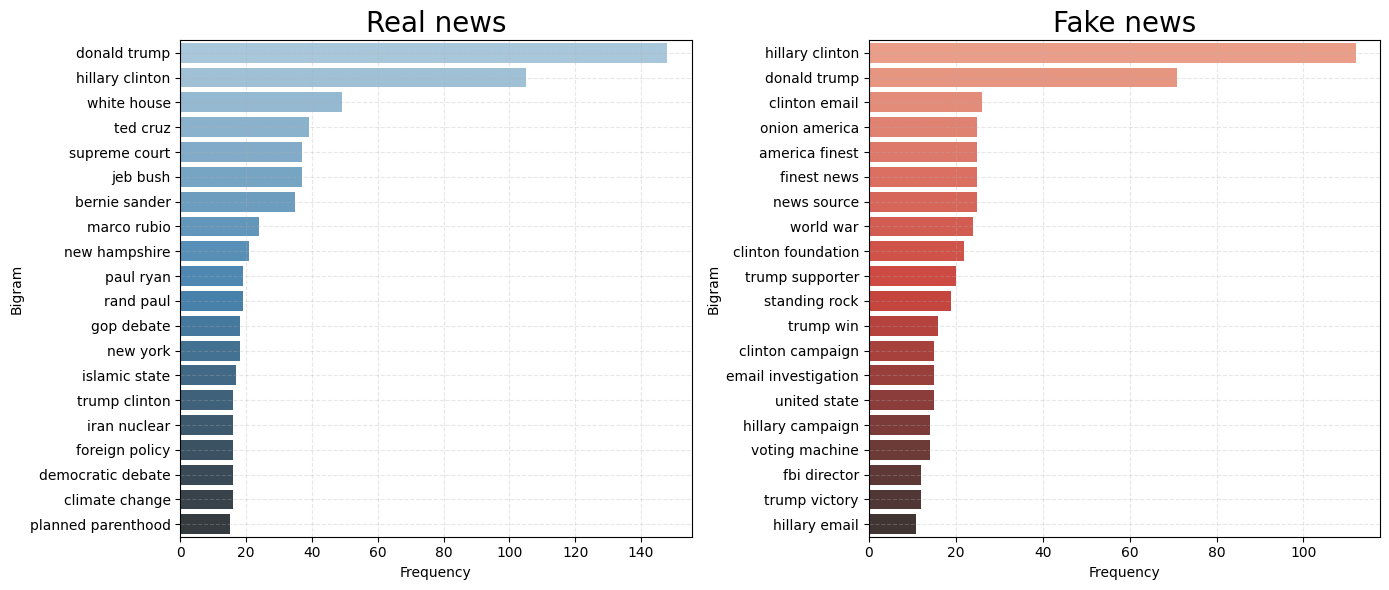

In [413]:
# Get the bigrams and then plot them
real_title_words_freq = get_ngrams(X_train[y_train==0]['title'], n=2)
fake_title_words_freq = get_ngrams(X_train[y_train==1]['title'], n=2)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0] = sns.barplot(x='Frequency', y='N-gram', data=real_title_words_freq[:20], ax=ax[0], palette='Blues_d')
ax[0].set_title('Real news', fontsize=20)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Bigram')
ax[0].grid(linestyle='--', alpha=0.3)
ax[1] = sns.barplot(x='Frequency', y='N-gram', data=fake_title_words_freq[:20], ax=ax[1], palette='Reds_d')
ax[1].set_title('Fake news', fontsize=20)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Bigram')
ax[1].grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show();

The conclusions we can draw are essentially the same as for the news texts. With respect to news texts, we note two differences:
- The headlines of fake news contain ‘anomalous’ bigrams, which do not appear in those of real news. Once again, we can attribute this phenomenon to the less formal and more sensationalistic language of fake news. Moreover, those who spread fake news often have the main aim of attracting as many visitors as possible, by drawing their attention with impactful headlines. Note also the presence of bigrams containing only the word ‘hillary’, referring to the previous discussion.
- The frequency of bigrams is similarly distributed here between real and fake news: even in real news, there is an important gap between the first two positions and the next. Given the nature and purpose of the headlines, it is clearly convenient to get straight to the point, and thus refer directly to the candidates or the topic of interest without periphrases or implicit references.

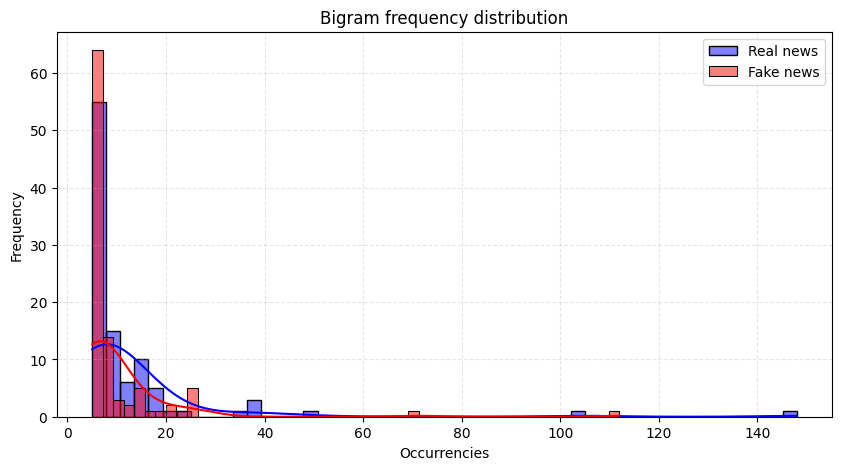

In [414]:
# Plot the distribution of the bigrams
plt.figure(figsize=(10, 5))
sns.histplot(real_title_words_freq['Frequency'][:100], bins=50, color='blue', label='Real news', kde=True)
sns.histplot(fake_title_words_freq['Frequency'][:100], bins=50, color='red', label='Fake news', kde=True)
plt.xlabel('Occurrencies')
plt.ylabel('Frequency')
plt.title('Bigram frequency distribution')
plt.legend()
plt.grid(linestyle='--', alpha=0.3)
plt.show();